In [1]:
import pandas as pd
import numpy as np

nodes  = pd.read_csv(r"data/nodes.pkl")
orders = pd.read_csv(r"data/orders.csv")
nodes_info = pd.read_pickle(r"data/my_data.pkl")
sun_data = pd.read_pickle(r"data/sun_data.pkl")
weather_data = pd.read_pickle(r"data/weather_data.pkl")

In [2]:
nodes_info = nodes_info[["id", "lat", "lon"]]

In [3]:
nodes_info.head(3)

,id,lat,lon
0,8952486639,27.993592,91.386575
1,10980417,46.468524,30.738275
2,10980418,46.469605,30.738516


In [4]:
nodes = nodes.merge(nodes_info, left_on='node_start', right_on='id')
nodes.rename(columns = {
    'lat' : 'lat_start',
    'lon' : 'lon_start'
}, inplace=True)
nodes = nodes.merge(nodes_info, left_on='node_finish', right_on='id')
nodes.rename(columns = {
    'lat' : 'lat_finish',
    'lon' : 'lon_finish'
}, inplace=True)
nodes.drop(['id_x', 'id_y'], axis=1, inplace=True)
nodes.dropna(inplace=True)

In [5]:
nodes.drop(['node_start', 'node_finish'], axis=1, inplace=True)

In [6]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454941 entries, 0 to 458822
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          454941 non-null  int64  
 1   distance    454941 non-null  float64
 2   speed       454941 non-null  float64
 3   lat_start   454941 non-null  float64
 4   lon_start   454941 non-null  float64
 5   lat_finish  454941 non-null  float64
 6   lon_finish  454941 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 27.8 MB


In [7]:
nodes

,Id,distance,speed,lat_start,lon_start,lat_finish,lon_finish
0,-2627062893189810184,17.414917,32.0,46.472665,30.739248,46.472682,30.739022
1,-6374252502568484586,17.414917,25.0,46.472665,30.739248,46.472682,30.739022
2,-8332603950975862627,17.414917,30.0,46.472665,30.739248,46.472682,30.739022
3,6728710084682273587,17.414917,27.0,46.472665,30.739248,46.472682,30.739022
4,8390209597485549084,17.415147,38.0,46.472665,30.739248,46.472682,30.739022
...,...,...,...,...,...,...,...
458814,-2224898000409909488,13.875819,30.0,46.364554,30.647757,46.364451,30.647655
458815,-2224898000409909488,11.278160,29.0,46.364730,30.648009,46.364661,30.647900
458817,-2224898000409909488,129.549959,30.0,46.365897,30.662418,46.365771,30.660740
458819,-2224898000409909488,49.888677,30.0,46.365367,30.654700,46.365324,30.654052


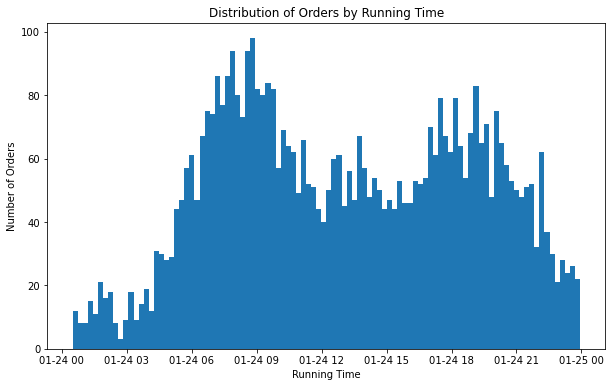

In [8]:
import matplotlib.pyplot as plt

# Create a histogram of the "running_time" column
plt.figure(figsize=(10, 6))
plt.hist(pd.to_datetime(orders["running_time"]), bins=100)

# Set the title and labels for the plot
plt.title("Distribution of Orders by Running Time")
plt.xlabel("Running Time")
plt.ylabel("Number of Orders")

# Show the plot
plt.show()

In [9]:
orders = orders.query('route_distance_km > 0.2').reset_index()

In [10]:
orders['running_time'] = pd.to_datetime(orders['running_time'])
orders['hour'] = orders['running_time'].dt.hour
orders_per_hour = orders.groupby('hour')['Id'].count()
max_orders = orders_per_hour.max()
orders_per_hour = orders_per_hour / max_orders
orders = orders.merge(orders_per_hour, on='hour').rename(columns={'Id_y': 'orders_per_hour', 'Id_x': 'Id'})
orders.drop(['hour', 'index'], axis=1, inplace=True)

In [11]:
orders

,Id,running_time,completed_time,route_distance_km,delta_time,orders_per_hour
0,-4773019581999572651,2022-01-24 18:30:21,2022-01-24 18:44:43,3.740,862.0,0.766129
1,-8362368096859141738,2022-01-24 18:37:36,2022-01-24 18:42:18,2.705,282.0,0.766129
2,1960386351870197879,2022-01-24 18:30:16,2022-01-24 18:40:42,5.689,626.0,0.766129
3,5441370356164551342,2022-01-24 18:12:53,2022-01-24 18:22:37,3.897,584.0,0.766129
4,6186515289794562762,2022-01-24 18:05:19,2022-01-24 18:17:05,2.803,706.0,0.766129
...,...,...,...,...,...,...
4990,1232212655921391683,2022-01-24 00:30:04,2022-01-24 00:40:54,8.023,650.0,0.051075
4991,86817563834526930,2022-01-24 00:36:16,2022-01-24 00:47:22,6.940,666.0,0.051075
4992,-3569466844569022542,2022-01-24 00:53:10,2022-01-24 00:59:56,2.819,406.0,0.051075
4993,6004099879258921398,2022-01-24 00:42:35,2022-01-24 00:48:00,2.306,325.0,0.051075


In [12]:
all_data = orders.merge(nodes, how='left', on='Id')
all_data.drop('completed_time', axis=1, inplace=True)
orders.drop('completed_time', axis=1, inplace=True)

In [13]:
all_data['lat_start'] = round(all_data['lat_start'], 2)
all_data['lon_start'] = round(all_data['lon_start'], 2)
all_data['lat_finish'] = round(all_data['lat_finish'], 2)
all_data['lon_finish'] = round(all_data['lon_finish'], 2)

In [14]:
all_data['date_of_order'] = pd.to_datetime(all_data.running_time).dt.date
all_data['time_of_order'] = pd.to_datetime(all_data.running_time).dt.time
all_data.drop('running_time', axis=1, inplace=True)

In [15]:
all_data = all_data.query('(45<lat_start<47)&(45<lat_finish<47)&(29.5<lon_start<31.5)&(29.5<lon_finish<31.5)')

In [16]:
parse_indexes = all_data.groupby(['lon_start', 'lat_start', 'date_of_order']).agg('count').index

In [119]:
import requests
import json
import datetime
import pytz

utc_timezone = pytz.timezone('UTC')
kyiv_timezone = pytz.timezone('Europe/Kiev')

sunny = {'lat_start': [], 'lon_start': [], 'date_of_order': [], 'sunrise': [], 'sunset': []}
for start_lon, lat_start, date in parse_indexes:
    url = f"https://api.sunrise-sunset.org/json?lat={lat_start}&lng={start_lon}&date={date}"
    utc_sunrise_time = datetime.datetime.strptime(json.loads(requests.get(url).content)['results']['sunrise'], '%I:%M:%S %p')
    utc_sunset_time = datetime.datetime.strptime(json.loads(requests.get(url).content)['results']['sunset'], '%I:%M:%S %p')
    utc_sunrise_time = utc_timezone.localize(utc_sunrise_time)
    utc_sunset_time = utc_timezone.localize(utc_sunset_time)
    kyiv_sunrise_time = utc_sunrise_time.astimezone(kyiv_timezone)
    kyiv_sunset_time = utc_sunset_time.astimezone(kyiv_timezone)
    time_str_24h_sunrise = kyiv_sunrise_time.strftime('%H:%M:%S')
    time_str_24h_sunset = kyiv_sunset_time.strftime('%H:%M:%S')
    sunny['lat_start'].append(lat_start)
    sunny['lon_start'].append(start_lon)
    sunny['date_of_order'].append(date)
    sunny['sunrise'].append(time_str_24h_sunrise)
    sunny['sunset'].append(time_str_24h_sunset)
sun_data = pd.DataFrame(sunny)

In [17]:
all_data = all_data.merge(sun_data, on=['lat_start', 'lon_start', 'date_of_order'])

In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331338 entries, 0 to 331337
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 331338 non-null  int64  
 1   route_distance_km  331338 non-null  float64
 2   delta_time         331338 non-null  float64
 3   orders_per_hour    331338 non-null  float64
 4   distance           331338 non-null  float64
 5   speed              331338 non-null  float64
 6   lat_start          331338 non-null  float64
 7   lon_start          331338 non-null  float64
 8   lat_finish         331338 non-null  float64
 9   lon_finish         331338 non-null  float64
 10  date_of_order      331338 non-null  object 
 11  time_of_order      331338 non-null  object 
 12  sunrise            331338 non-null  object 
 13  sunset             331338 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 37.9+ MB


In [19]:
all_data["is_day"] = (all_data["sunrise"] < all_data["time_of_order"].astype('str')) & (all_data["time_of_order"].astype('str') < all_data["sunset"])

In [20]:
all_data

,Id,route_distance_km,delta_time,orders_per_hour,distance,speed,lat_start,lon_start,lat_finish,lon_finish,date_of_order,time_of_order,sunrise,sunset,is_day
0,-4773019581999572651,3.740,862.0,0.766129,13.453126,30.0,46.47,30.74,46.47,30.74,2022-01-24,18:30:21,07:29:39,16:52:31,False
1,-4773019581999572651,3.740,862.0,0.766129,13.196971,30.0,46.47,30.74,46.47,30.74,2022-01-24,18:30:21,07:29:39,16:52:31,False
2,-4773019581999572651,3.740,862.0,0.766129,31.771489,30.0,46.47,30.74,46.47,30.74,2022-01-24,18:30:21,07:29:39,16:52:31,False
3,-4773019581999572651,3.740,862.0,0.766129,3.673054,24.0,46.47,30.74,46.47,30.74,2022-01-24,18:30:21,07:29:39,16:52:31,False
4,-4773019581999572651,3.740,862.0,0.766129,8.711180,25.0,46.47,30.74,46.47,30.74,2022-01-24,18:30:21,07:29:39,16:52:31,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331333,7942069612812417463,6.121,729.0,0.123656,15.707567,29.0,46.60,30.79,46.60,30.79,2022-01-24,02:12:15,07:29:50,16:51:56,False
331334,7942069612812417463,6.121,729.0,0.123656,5.723713,30.0,46.60,30.79,46.60,30.79,2022-01-24,02:12:15,07:29:50,16:51:56,False
331335,7942069612812417463,6.121,729.0,0.123656,71.361415,30.0,46.60,30.79,46.60,30.79,2022-01-24,02:12:15,07:29:50,16:51:56,False
331336,7942069612812417463,6.121,729.0,0.123656,32.171977,30.0,46.60,30.79,46.60,30.79,2022-01-24,02:12:15,07:29:50,16:51:56,False


In [21]:
orders

,Id,running_time,route_distance_km,delta_time,orders_per_hour
0,-4773019581999572651,2022-01-24 18:30:21,3.740,862.0,0.766129
1,-8362368096859141738,2022-01-24 18:37:36,2.705,282.0,0.766129
2,1960386351870197879,2022-01-24 18:30:16,5.689,626.0,0.766129
3,5441370356164551342,2022-01-24 18:12:53,3.897,584.0,0.766129
4,6186515289794562762,2022-01-24 18:05:19,2.803,706.0,0.766129
...,...,...,...,...,...
4990,1232212655921391683,2022-01-24 00:30:04,8.023,650.0,0.051075
4991,86817563834526930,2022-01-24 00:36:16,6.940,666.0,0.051075
4992,-3569466844569022542,2022-01-24 00:53:10,2.819,406.0,0.051075
4993,6004099879258921398,2022-01-24 00:42:35,2.306,325.0,0.051075


In [235]:
weather = {'lat_start': [], 'lon_start': [], 'date_of_order': [], 'time': [], 'temperature':[],'precipitation':[]}
for start_lon, lat_start, date in parse_indexes:
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat_start}&longitude={start_lon}&start_date={date}&end_date={date}&hourly=temperature_2m,precipitation&timezone=Europe%2FBerlin"
    time_strings=json.loads(requests.get(url).content)['hourly']['time']
    temperature_strings=json.loads(requests.get(url).content)['hourly']['temperature_2m']
    precipitation_strings=json.loads(requests.get(url).content)['hourly']['precipitation']
    
    for item in range(len(time_strings)):
        weather['lat_start'].append(lat_start)
        weather['lon_start'].append(start_lon)
        weather['date_of_order'].append(date)
        weather['time'].append(datetime.datetime.strptime(time_strings[item], "%Y-%m-%dT%H:%M"))
        weather['temperature'].append(temperature_strings[item])
        weather['precipitation'].append(precipitation_strings[item])

weather_data = pd.DataFrame(weather)
weather_data['time'] = weather_data['time'].dt.time.astype('str')

In [22]:
all_data["time"] = all_data.time_of_order.astype(str).str.slice(stop=2)+ ":00:00"

In [23]:
all_data = all_data.merge(weather_data, how='left', on=['lat_start', 'lon_start', 'date_of_order', 'time'])

In [24]:
all_data.drop(['date_of_order', 'sunrise', 'sunset', 'time'], axis=1, inplace=True)

In [25]:
all_data

,Id,route_distance_km,delta_time,orders_per_hour,distance,speed,lat_start,lon_start,lat_finish,lon_finish,time_of_order,is_day,temperature,precipitation
0,-4773019581999572651,3.740,862.0,0.766129,13.453126,30.0,46.47,30.74,46.47,30.74,18:30:21,False,-4.0,0.3
1,-4773019581999572651,3.740,862.0,0.766129,13.196971,30.0,46.47,30.74,46.47,30.74,18:30:21,False,-4.0,0.3
2,-4773019581999572651,3.740,862.0,0.766129,31.771489,30.0,46.47,30.74,46.47,30.74,18:30:21,False,-4.0,0.3
3,-4773019581999572651,3.740,862.0,0.766129,3.673054,24.0,46.47,30.74,46.47,30.74,18:30:21,False,-4.0,0.3
4,-4773019581999572651,3.740,862.0,0.766129,8.711180,25.0,46.47,30.74,46.47,30.74,18:30:21,False,-4.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331333,7942069612812417463,6.121,729.0,0.123656,15.707567,29.0,46.60,30.79,46.60,30.79,02:12:15,False,-3.7,0.0
331334,7942069612812417463,6.121,729.0,0.123656,5.723713,30.0,46.60,30.79,46.60,30.79,02:12:15,False,-3.7,0.0
331335,7942069612812417463,6.121,729.0,0.123656,71.361415,30.0,46.60,30.79,46.60,30.79,02:12:15,False,-3.7,0.0
331336,7942069612812417463,6.121,729.0,0.123656,32.171977,30.0,46.60,30.79,46.60,30.79,02:12:15,False,-3.7,0.0


In [26]:
from copy import deepcopy
all_data_copy = deepcopy(all_data)

In [27]:
all_data_copy.drop(['lat_start', 'lat_finish', 'lon_start','lon_finish'], axis=1, inplace=True)

In [51]:
final_data = all_data_copy.groupby(['Id'], as_index=False).agg({
    'time_of_order' : 'count',
    'route_distance_km' : 'mean',
    'delta_time': 'mean',
    'orders_per_hour': 'mean',
    'speed' : 'mean',
    'distance': 'sum',
    'is_day': 'median',
    'temperature': 'mean',
    'precipitation': 'mean'
})

In [52]:
final_data.drop('Id', axis=1, inplace=True)

In [53]:
final_data.rename(columns={'time_of_order': 'nodes_number'}, inplace=True)

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
final_data[['nodes_number', 'speed', 'route_distance_km', 'distance', 'temperature', 'precipitation']] = sc.fit_transform(
    final_data[['nodes_number', 'speed', 'route_distance_km', 'distance', 'temperature', 'precipitation']])

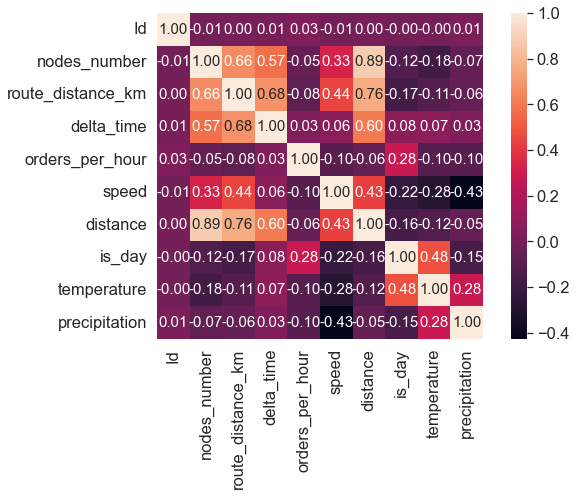

In [355]:
cols = final_data.columns
plt.figure(figsize=(10, 6))
cm = np.corrcoef(final_data[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, 
cbar = True,
 annot = True, 
 square = True,
 fmt = '.2f',
 annot_kws = {'size': 15},
 yticklabels = cols,
 xticklabels = cols)
plt.show()

In [56]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(final_data, target = 'delta_time', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

In [57]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [58]:
from sklearn.linear_model import LinearRegression

first = LinearRegression()
first.fit(X_train, y_train)
rmse(y_valid, first.predict(X_valid))

135.4455955497885

In [59]:
from sklearn.ensemble import RandomForestRegressor

second = RandomForestRegressor()
second.fit(X_train, y_train)
rmse(y_valid, second.predict(X_valid))

127.64009153213838

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(loss='absolute_error')
boost.fit(X_train, y_train)
rmse(y_valid, boost.predict(X_valid))

128.87236361089379

In [88]:
from sklearn.ensemble import AdaBoostRegressor

boost2 = AdaBoostRegressor(estimator=second, loss='linear')
boost2.fit(X_train, y_train)
rmse(y_valid, boost2.predict(X_valid))

128.77584624514142

In [85]:
boost2.feature_importances_

array([0.11140916, 0.40149822, 0.06957189, 0.15345452, 0.12462181,
       0.01770331, 0.1041953 , 0.01754578])

In [86]:
X_train.columns

Index(['nodes_number', 'route_distance_km', 'orders_per_hour', 'speed',
       'distance', 'is_day', 'temperature', 'precipitation'],
      dtype='object')

In [89]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=5)
xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [90]:
rmse(y_test, xgb_model.predict(X_test))

126.32564102307536

In [91]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 500, 1000]
}
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_set=[(X_valid, y_valid)])
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
xgb_model_best = grid_search.best_estimator_

[05:53:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set" } are not used.

[0]	validation_0-rmse:629.92850
[1]	validation_0-rmse:623.95157
[2]	validation_0-rmse:618.03566
[3]	validation_0-rmse:612.18496
[4]	validation_0-rmse:606.37760
[5]	validation_0-rmse:600.63188
[6]	validation_0-rmse:594.96311
[7]	validation_0-rmse:589.33861
[8]	validation_0-rmse:583.75765
[9]	validation_0-rmse:578.22476
[10]	validation_0-rmse:572.79423
[11]	validation_0-rmse:567.38921
[12]	validation_0-rmse:562.03124
[13]	validation_0-rmse:556.74071
[14]	validation_0-rmse:551.53537
[15]	validation_0-rmse:546.34681
[16]	validation_0-rmse:541.23542
[17]	validation_0-rmse:536.15636
[18]	validation_0-rmse:531.12173
[19]	validation_0-rmse:526.15763
[20]	validation_0-rmse:521.23037
[21]	validation_0-rmse:516.36343
[22]	validation_0-rmse:511.55387
[23]	validation_0-rmse:506.80204
[24]	validation_0-rm

[239]	validation_0-rmse:142.05413
[240]	validation_0-rmse:141.82463
[241]	validation_0-rmse:141.59805
[242]	validation_0-rmse:141.39777
[243]	validation_0-rmse:141.18589
[244]	validation_0-rmse:140.95159
[245]	validation_0-rmse:140.75867
[246]	validation_0-rmse:140.54147
[247]	validation_0-rmse:140.34078
[248]	validation_0-rmse:140.12090
[249]	validation_0-rmse:139.93853
[250]	validation_0-rmse:139.75123
[251]	validation_0-rmse:139.55897
[252]	validation_0-rmse:139.38159
[253]	validation_0-rmse:139.17955
[254]	validation_0-rmse:139.00232
[255]	validation_0-rmse:138.83185
[256]	validation_0-rmse:138.66014
[257]	validation_0-rmse:138.48927
[258]	validation_0-rmse:138.32516
[259]	validation_0-rmse:138.16785
[260]	validation_0-rmse:138.02361
[261]	validation_0-rmse:137.84611
[262]	validation_0-rmse:137.68172
[263]	validation_0-rmse:137.53248
[264]	validation_0-rmse:137.38342
[265]	validation_0-rmse:137.21927
[266]	validation_0-rmse:137.08599
[267]	validation_0-rmse:136.93682
[268]	validati

[480]	validation_0-rmse:129.08561
[481]	validation_0-rmse:129.08093
[482]	validation_0-rmse:129.06967
[483]	validation_0-rmse:129.06212
[484]	validation_0-rmse:129.06493
[485]	validation_0-rmse:129.06075
[486]	validation_0-rmse:129.04994
[487]	validation_0-rmse:129.04624
[488]	validation_0-rmse:129.03529
[489]	validation_0-rmse:129.04738
[490]	validation_0-rmse:129.03993
[491]	validation_0-rmse:129.03526
[492]	validation_0-rmse:129.03003
[493]	validation_0-rmse:129.03182
[494]	validation_0-rmse:129.04412
[495]	validation_0-rmse:129.03008
[496]	validation_0-rmse:129.02707
[497]	validation_0-rmse:129.01326
[498]	validation_0-rmse:129.00868
[499]	validation_0-rmse:129.00244
[500]	validation_0-rmse:128.99919
[501]	validation_0-rmse:128.99015
[502]	validation_0-rmse:128.99247
[503]	validation_0-rmse:128.99384
[504]	validation_0-rmse:128.98912
[505]	validation_0-rmse:128.97613
[506]	validation_0-rmse:128.97401
[507]	validation_0-rmse:128.96053
[508]	validation_0-rmse:128.97135
[509]	validati

[721]	validation_0-rmse:128.52715
[722]	validation_0-rmse:128.52540
[723]	validation_0-rmse:128.53636
[724]	validation_0-rmse:128.53050
[725]	validation_0-rmse:128.53338
[726]	validation_0-rmse:128.53347
[727]	validation_0-rmse:128.53364
[728]	validation_0-rmse:128.52932
[729]	validation_0-rmse:128.52274
[730]	validation_0-rmse:128.52997
[731]	validation_0-rmse:128.52587
[732]	validation_0-rmse:128.52749
[733]	validation_0-rmse:128.52839
[734]	validation_0-rmse:128.53494
[735]	validation_0-rmse:128.52936
[736]	validation_0-rmse:128.52964
[737]	validation_0-rmse:128.53869
[738]	validation_0-rmse:128.53892
[739]	validation_0-rmse:128.53331
[740]	validation_0-rmse:128.53894
[741]	validation_0-rmse:128.53512
[742]	validation_0-rmse:128.53163
[743]	validation_0-rmse:128.53329
[744]	validation_0-rmse:128.54230
[745]	validation_0-rmse:128.53701
[746]	validation_0-rmse:128.53016
[747]	validation_0-rmse:128.52740
[748]	validation_0-rmse:128.52819
[749]	validation_0-rmse:128.53177
[750]	validati

[962]	validation_0-rmse:128.46151
[963]	validation_0-rmse:128.45401
[964]	validation_0-rmse:128.45793
[965]	validation_0-rmse:128.45928
[966]	validation_0-rmse:128.46137
[967]	validation_0-rmse:128.46333
[968]	validation_0-rmse:128.45779
[969]	validation_0-rmse:128.46248
[970]	validation_0-rmse:128.46335
[971]	validation_0-rmse:128.45895
[972]	validation_0-rmse:128.46579
[973]	validation_0-rmse:128.46659
[974]	validation_0-rmse:128.46565
[975]	validation_0-rmse:128.47057
[976]	validation_0-rmse:128.46969
[977]	validation_0-rmse:128.46916
[978]	validation_0-rmse:128.46900
[979]	validation_0-rmse:128.47349
[980]	validation_0-rmse:128.47825
[981]	validation_0-rmse:128.47773
[982]	validation_0-rmse:128.47461
[983]	validation_0-rmse:128.48150
[984]	validation_0-rmse:128.48339
[985]	validation_0-rmse:128.48355
[986]	validation_0-rmse:128.48454
[987]	validation_0-rmse:128.48382
[988]	validation_0-rmse:128.48479
[989]	validation_0-rmse:128.48428
[990]	validation_0-rmse:128.48339
[991]	validati

In [79]:
rmse(y_test, xgb_model_best.predict(X_test))

128.91469753141052

In [80]:
from sklearn.svm import SVR

third = SVR()
third.fit(X_train, y_train)
rmse(y_valid, third.predict(X_valid))

149.6933348316174

In [82]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train model with default hyperparameters and evaluate on validation set
model = XGBRegressor()
model.fit(X_train, y_train)
y_valid_pred = model.predict(X_valid)
mse_valid = rmse(y_valid, y_valid_pred)
print("MSE on validation set:", mse_valid)

# Perform hyperparameter tuning using GridSearchCV
params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.1, 0.01, 0.001],
    "max_depth": [3, 5, 7]
}
grid_search = RandomizedSearchCV(model, params, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

# Train final model with best hyperparameters on combined train and validation sets
best_model = XGBRegressor(**grid_search.best_params_)
best_model.fit(X_train.append(X_valid), y_train.append(y_valid))

# Evaluate final model on test set
y_test_pred = best_model.predict(X_test)
mse_test = rmse(y_test, y_test_pred)
print("MSE on test set:", mse_test)


MSE on validation set: 133.93289881013908
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
MSE on test set: 128.52427595746096


In [98]:
from sklearn.ensemble import VotingRegressor

vots = VotingRegressor(estimators=[('b1', boost), ('b2', boost2)])
vots.fit(X_train, y_train)
rmse(y_train, vots.predict(X_train))

71.47252720113785

In [100]:
rmse(y_valid, vots.predict(X_valid))

126.68023528042252

In [102]:
parameters = {
    'weights' : [
        [0.1, 0.1], [0.1, 0.2], [0.1, 0.3], [0.1, 0.4], [0.1, 0.5], [0.1, 0.6], [0.1, 0.7], [0.1, 0.8], [0.1, 0.9],
        [0.2, 0.1], [0.2, 0.2], [0.2, 0.3], [0.2, 0.4], [0.2, 0.5], [0.2, 0.6], [0.2, 0.7], [0.2, 0.8], [0.2, 0.9],
        [0.3, 0.1], [0.3, 0.2], [0.3, 0.3], [0.3, 0.4], [0.3, 0.5], [0.3, 0.6], [0.3, 0.7], [0.3, 0.8], [0.3, 0.9],
        [0.4, 0.1], [0.4, 0.2], [0.4, 0.3], [0.4, 0.4], [0.4, 0.5], [0.4, 0.6], [0.4, 0.7], [0.4, 0.8], [0.4, 0.9],
        [0.5, 0.1], [0.5, 0.2], [0.5, 0.3], [0.5, 0.4], [0.5, 0.5], [0.5, 0.6], [0.5, 0.7], [0.5, 0.8], [0.5, 0.9],
        [0.6, 0.1], [0.6, 0.2], [0.6, 0.3], [0.6, 0.4], [0.6, 0.5], [0.6, 0.6], [0.6, 0.7], [0.6, 0.8], [0.6, 0.9],
        [0.7, 0.1], [0.7, 0.2], [0.7, 0.3], [0.7, 0.4], [0.7, 0.5], [0.7, 0.6], [0.7, 0.7], [0.7, 0.8], [0.7, 0.9],
        [0.8, 0.1], [0.8, 0.2], [0.8, 0.3], [0.8, 0.4], [0.8, 0.5], [0.8, 0.6], [0.8, 0.7], [0.8, 0.8], [0.8, 0.9],
        [0.9, 0.1], [0.9, 0.2], [0.9, 0.3], [0.9, 0.4], [0.9, 0.5], [0.9, 0.6], [0.9, 0.7], [0.9, 0.8], [0.9, 0.9]
    ]
}
vots_the_best = RandomizedSearchCV(vots, parameters, n_iter=50, scoring='neg_mean_squared_error', random_state=42)
vots_the_best.fit(X_valid, y_valid)
vots_the_best = vots_the_best.best_estimator_
print('-------------------------------------------------------------')
rmse(y_valid, vots_the_best.predict(X_valid))

-------------------------------------------------------------
VALID SET:
TEST  SET:


132.37566598491392

In [142]:
rmse(y_valid, vots_the_best.predict(X_valid))

64.86540531126863

In [109]:
test_data = pd.read_pickle(r'data/test.pkl')

In [132]:
ids = test_data['Id']
predict = vots_the_best.predict(test_data.drop('Id', axis=1))
results = pd.DataFrame({'Id': list(ids), 'Predicted':  predict})
results = results.set_index('Id')
results.to_csv('res.csv')

In [141]:
ids = test_data['Id']
xgpredict = xgb_model_best.predict(test_data.drop('Id', axis=1))
xgresults = pd.DataFrame({'Id': list(ids), 'Predicted':  xgpredict})
xgresults = xgresults.set_index('Id')
xgresults.to_csv('resxg.csv')